In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
Line or Plane: ax + by + c = 0 or ax + by + cz + d = 0
Ray: R(t) = (x,y) + t(vx,vy)

Intersection:
a(x + tvx) + b(y + tvy) + c = 0
t = - (ax + by + c) / (avx + bvy)
    Drop, if: t<0, (x,y) out of bounding box
'''

SMALL = 1e-20
class Line():
    def __init__(self, sepABC : np.array, BB : np.array):
        self.sepABC = sepABC 
        self.BBox = BB # shape: 2*2
    

In [3]:
def rayLineItsct(rayOrig, dir, line : Line):
    denom =  (line.sepABC[0] * dir[0] + line.sepABC[1] * dir[1])
    #print(denom)
    if np.abs(denom) < SMALL:
        return 0
    t =  -(line.sepABC[0] * rayOrig[0] + line.sepABC[1] * rayOrig[1] + line.sepABC[2]) / denom
    # - (-1*0.5 + 1 * 2.5) / -1 

    #print(t, "!!!") 
    if t < 0:
        return 0
    
    hitpoint = rayOrig + t * dir
    if hitpoint[0] < line.BBox[0][0] or hitpoint[0] > line.BBox[0][1] or hitpoint[1] < line.BBox[1][0] or hitpoint[1] > line.BBox[1][1]:
        return 0
    
    return (t, hitpoint)

In [4]:
line = Line(
    np.array([-1,1,0]),
    np.array([[0,1],[0,1]])
)

In [5]:
def rayTrial(line : Line):
    rayOrig = np.array([0.5,2])
    dirY = -1.0 
    dirX = 3*(np.random.rand()-0.5)
    #dirX = 0.0
    norm = np.sqrt(dirX**2 + dirY**2)
    
    dir = np.array([dirX/norm,dirY/norm])
    #print(dir  )
    itsct = rayLineItsct(rayOrig,dir,line)
    return itsct 


In [6]:
numRays = 1000
hitT = [] 
hitPt = []

for i in range(numRays):
    itsct = rayTrial(line)
    if itsct != 0:
        hitT.append(itsct[0])
        hitPt.append(itsct[1])
        #print(hitT, hitPt )



In [7]:
PTs = np.array(hitPt)
print(PTs.shape )

(240, 2)


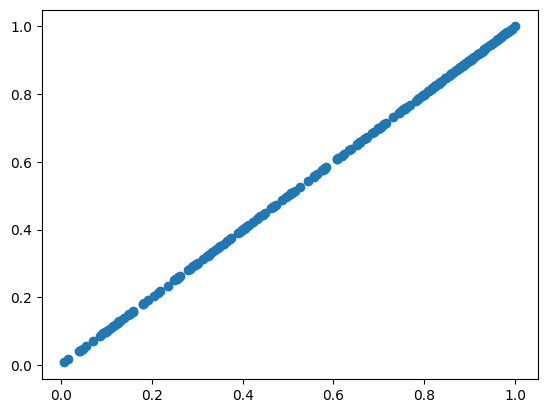

In [8]:
plt.scatter(PTs[:,0],PTs[:,1])

In [9]:
points = [] 
rayOrig = np.array([0.5,2])
dirY = -1.0 
dirX = 3*(np.random.rand()-0.5)
norm = np.sqrt(dirX**2 + dirY**2)
dir = np.array([dirX/norm,dirY/norm])
for tsteps in range(1000):
    t = 0.01 * tsteps 
    points.append(rayOrig + t * dir)

In [10]:
PTs = np.array(points).T
print(PTs.shape )

(2, 1000)


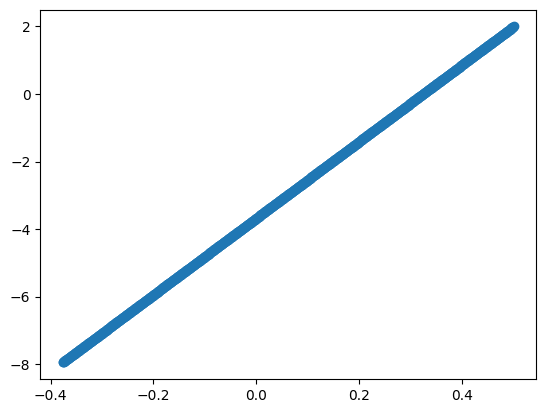

In [11]:
plt.scatter(PTs[0],PTs[1])